In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/22608.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/23274.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/23775.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/22046.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/23436.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/20684.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/20554.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/21093.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/24287.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/20762.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/24036.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/21808.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/21118.jpg
/kaggle/input/intel-image-dataset/Intel Image Datas

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahmasleam/intel-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/intel-image-dataset


In [3]:
import os

def count_folders_and_images(dataset_path):
    total_folders = 0
    total_images = 0
    for root, dirs, files in os.walk(dataset_path):
        total_folders += len(dirs)  # Count all directories
        total_images += len([file for file in files if file.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))])

    return total_folders, total_images

In [4]:
# Replace `path` with the actual path to your downloaded dataset folder
dataset_path = "/kaggle/input/intel-image-dataset/Intel Image Dataset"
num_folders, num_images = count_folders_and_images(dataset_path)

print(f"Number of folders (including subfolders): {num_folders}")
print(f"Number of images: {num_images}")

Number of folders (including subfolders): 6
Number of images: 3000


In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_dir = "/kaggle/input/intel-image-dataset/Intel Image Dataset" 
output_dir = '/kaggle/working/split_dataset' 
train_ratio = 0.8  

# Create output directories for train and test
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each category (subfolder) in the dataset
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)

    # Split the dataset into train and test
    train_images, test_images = train_test_split(images, train_size=train_ratio, random_state=42)

    # Create category subfolders in train and test directories
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    # Move images to respective directories
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_category_dir, image))

    for image in test_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(test_category_dir, image))

print(f"Dataset split complete!\nTrain directory: {train_dir}\nTest directory: {test_dir}")


Dataset split complete!
Train directory: /kaggle/working/split_dataset/train
Test directory: /kaggle/working/split_dataset/test


Random Train Images:
Showing random images from category: street


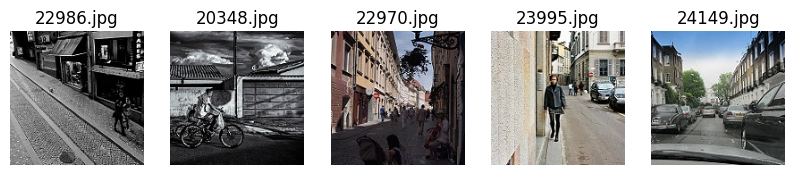

Random Test Images:
Showing random images from category: street


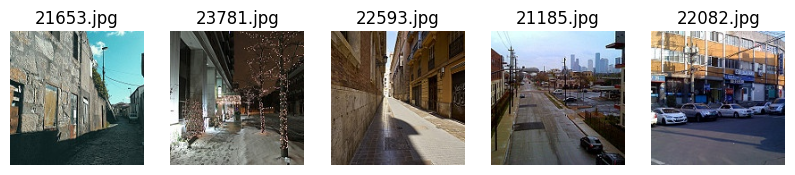

In [6]:
import os
import random
from matplotlib import pyplot as plt
from PIL import Image

directory = "/kaggle/input/intel-image-dataset/Intel Image Dataset" 

def show_random_images(directory, num_images=5):
    """
    Display random images from a directory.
    
    Args:
        directory (str): Path to the directory containing category subfolders.
        num_images (int): Number of random images to display.
    """
    # Get all category subfolders
    categories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    if not categories:
        print(f"No categories found in {directory}")
        return

    # Select random category and images
    category = random.choice(categories)
    category_path = os.path.join(directory, category)
    images = os.listdir(category_path)
    if not images:
        print(f"No images found in category {category} of {directory}")
        return

    random_images = random.sample(images, min(len(images), num_images))

    # Display images
    print(f"Showing random images from category: {category}")
    plt.figure(figsize=(10, 5))
    for i, image_name in enumerate(random_images, start=1):
        image_path = os.path.join(category_path, image_name)
        image = Image.open(image_path)
        plt.subplot(1, len(random_images), i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

# Display random images from train and test directories
print("Random Train Images:")
show_random_images('/kaggle/working/split_dataset/train')

print("Random Test Images:")
show_random_images('/kaggle/working/split_dataset/test')


Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.

Training only the FC layer...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 349ms/step - accuracy: 0.1532 - loss: 1.7937 - val_accuracy: 0.1844 - val_loss: 1.7891
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.1680 - loss: 1.7912 - val_accuracy: 0.1844 - val_loss: 1.7891
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.1796 - loss: 1.7882 - val_accuracy: 0.1844 - val_loss: 1.7892
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.1913 - loss: 1.7890 - val_accuracy: 0.1744 - val_loss: 1.7890
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.1834 - loss: 1.7878 - val_accuracy: 0.1844 - val_loss: 1.7890
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.1892 - loss: 1.7894 - val_accuracy: 0.1844 - val_loss: 1.7889
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.1840 - loss: 1.7861 - val_accuracy: 0.1844 - val_loss: 1.7889
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.1854 - loss: 1.7879 - val_accuracy: 0.1844 - val_loss: 

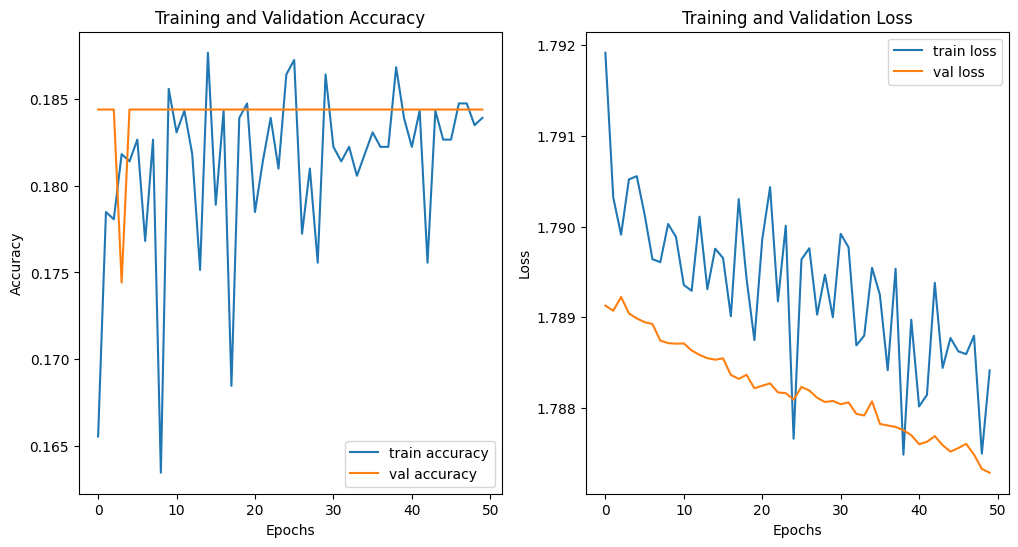

Confusion Matrix:
 [[  0   0  88   0   0   0]
 [  0   0  95   0   0   0]
 [  0   0 111   0   0   0]
 [  0   0 105   0   0   0]
 [  0   0 102   0   0   0]
 [  0   0 101   0   0   0]]


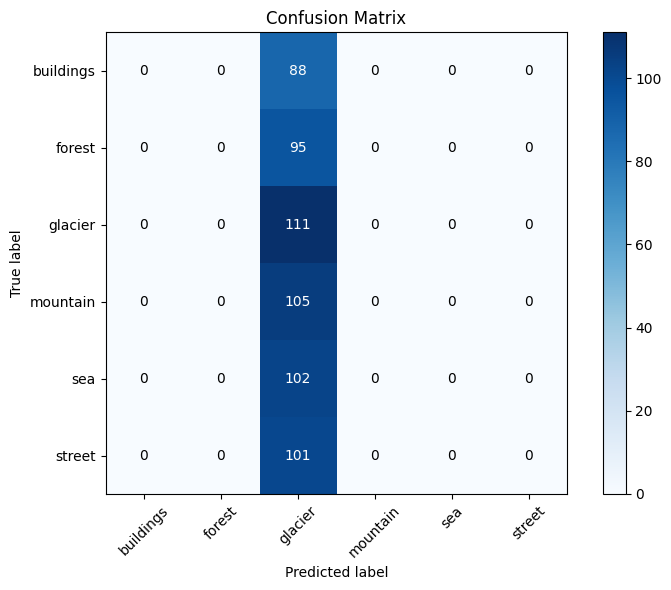

Classification Report:
               precision    recall  f1-score   support

   buildings       0.00      0.00      0.00        88
      forest       0.00      0.00      0.00        95
     glacier       0.18      1.00      0.31       111
    mountain       0.00      0.00      0.00       105
         sea       0.00      0.00      0.00       102
      street       0.00      0.00      0.00       101

    accuracy                           0.18       602
   macro avg       0.03      0.17      0.05       602
weighted avg       0.03      0.18      0.06       602


Proceeding to the main experiment with gradual unfreezing of layers...
Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with 0 layers unfrozen...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 243ms/step - accuracy: 0.1505 - loss: 1.7941 - val_accuracy: 0.1844 - val_loss: 1.7891
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.1905 - loss: 1.7892 - val_accuracy: 0.1844 - val_loss: 1.7889
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.1934 - loss: 1.7896 - val_accuracy: 0.1844 - val_loss: 1.7892
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.1785 - loss: 1.7879 - val_accuracy: 0.1844 - val_loss: 1.7889
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.1798 - loss: 1.7893 - val_accuracy: 0.1844 - val_loss: 1.7889
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.1772 - loss: 1.7899 - val_accuracy: 0.1844 - val_loss: 1.7889
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.1859 - loss: 1.7895 - val_accuracy: 0.1844 - val_loss: 1.7888
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.1748 - loss: 1.7901 - val_accuracy: 0.1844 - val_loss: 

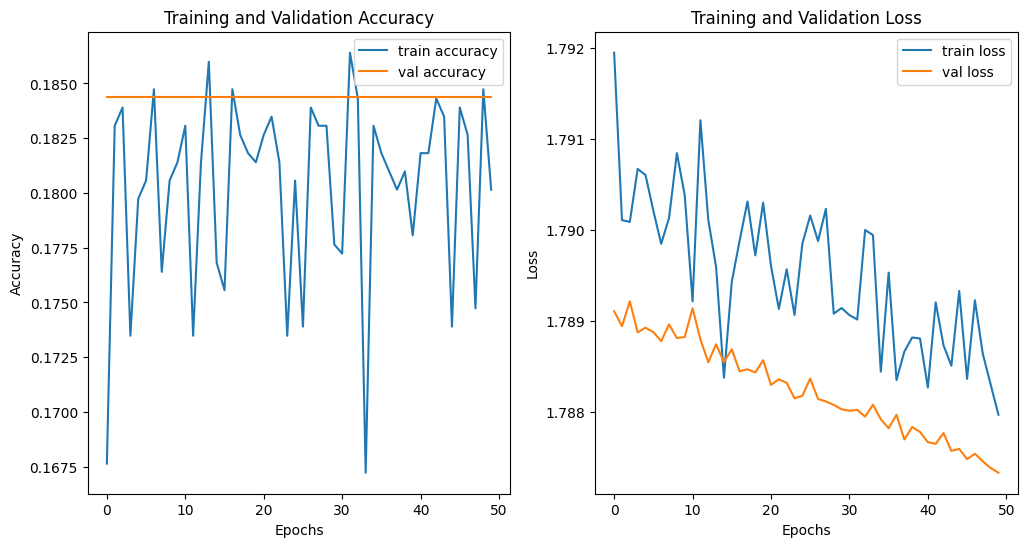

Confusion Matrix:
 [[  0   0  88   0   0   0]
 [  0   0  95   0   0   0]
 [  0   0 111   0   0   0]
 [  0   0 105   0   0   0]
 [  0   0 102   0   0   0]
 [  0   0 101   0   0   0]]


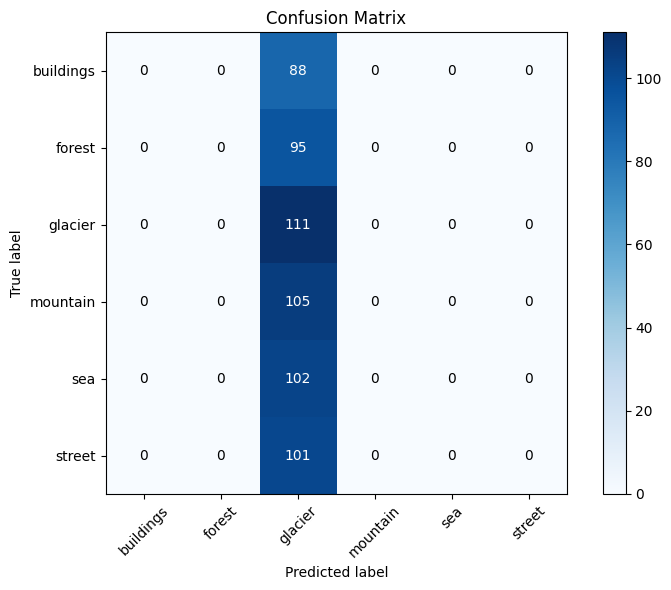

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

   buildings       0.00      0.00      0.00        88
      forest       0.00      0.00      0.00        95
     glacier       0.18      1.00      0.31       111
    mountain       0.00      0.00      0.00       105
         sea       0.00      0.00      0.00       102
      street       0.00      0.00      0.00       101

    accuracy                           0.18       602
   macro avg       0.03      0.17      0.05       602
weighted avg       0.03      0.18      0.06       602



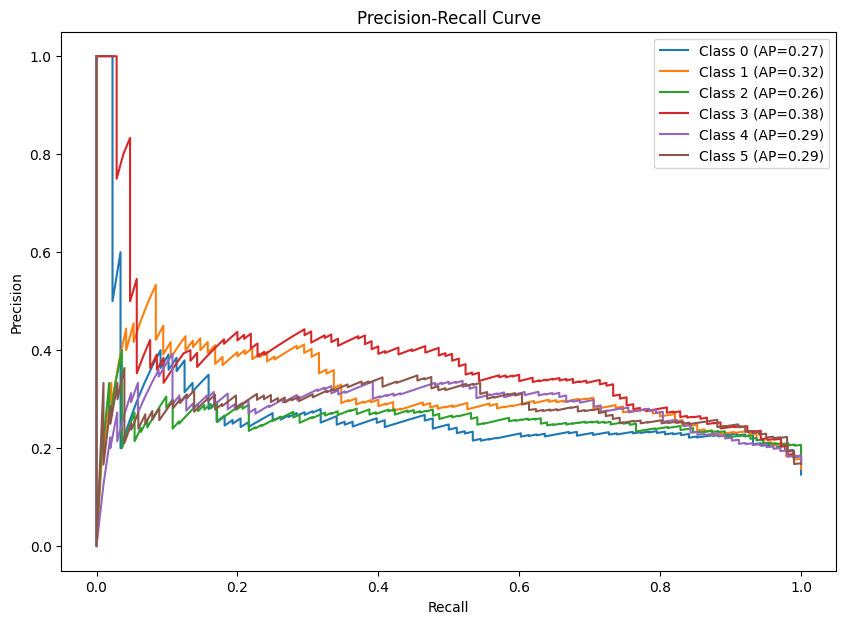


Training with 60 layers unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 366ms/step - accuracy: 0.1777 - loss: 1.8322 - val_accuracy: 0.1462 - val_loss: 1.8030
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.1963 - loss: 1.7832 - val_accuracy: 0.1694 - val_loss: 1.7957
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.2266 - loss: 1.7192 - val_accuracy: 0.1844 - val_loss: 1.7924
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.2036 - loss: 1.7255 - val_accuracy: 0.1844 - val_loss: 1.7942
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.2414 - loss: 1.6981 - val_accuracy: 0.1462 - val_loss: 1.8376
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.2383 - loss: 1.6771 - val_accuracy: 0.1462 - val_loss: 1.9011
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.2496 - loss: 1.6725 - val_accuracy: 0.1462 - val_loss: 2.1485
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.2371 - 

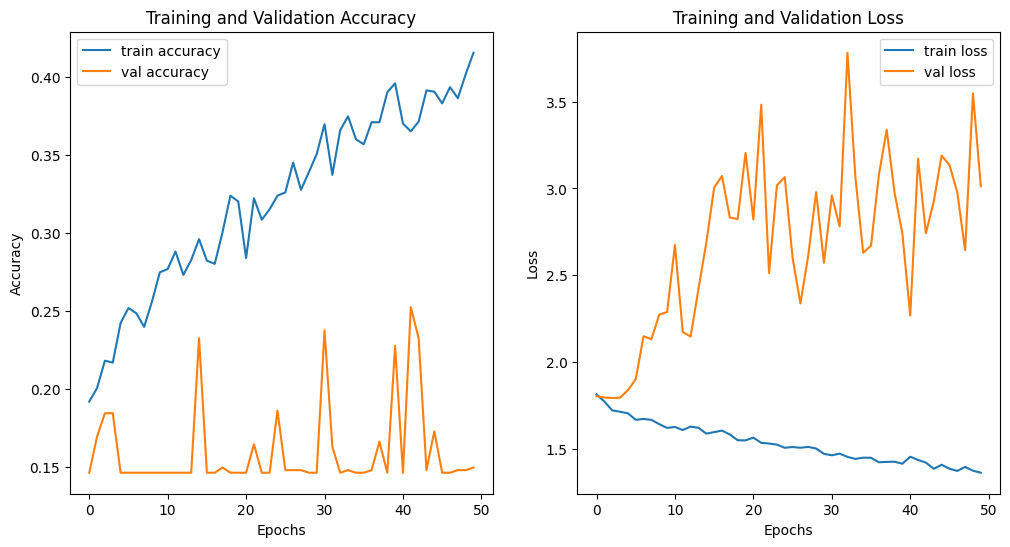

Confusion Matrix:
 [[ 88   0   0   0   0   0]
 [ 93   2   0   0   0   0]
 [111   0   0   0   0   0]
 [105   0   0   0   0   0]
 [102   0   0   0   0   0]
 [101   0   0   0   0   0]]


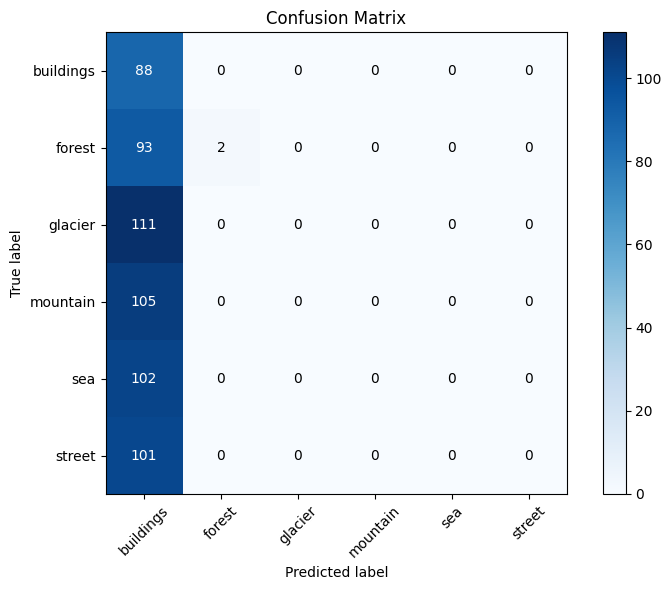

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

   buildings       0.15      1.00      0.26        88
      forest       1.00      0.02      0.04        95
     glacier       0.00      0.00      0.00       111
    mountain       0.00      0.00      0.00       105
         sea       0.00      0.00      0.00       102
      street       0.00      0.00      0.00       101

    accuracy                           0.15       602
   macro avg       0.19      0.17      0.05       602
weighted avg       0.18      0.15      0.04       602



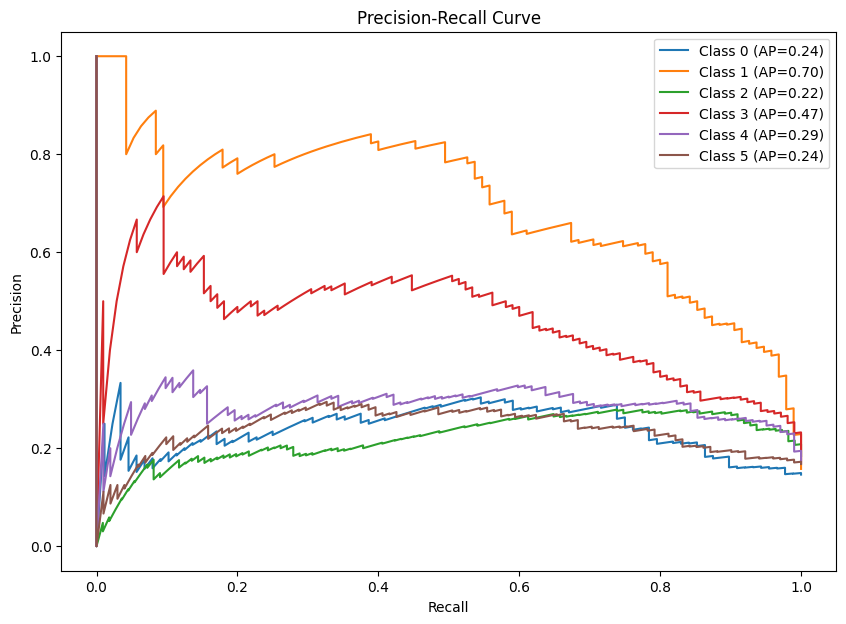


Training with 120 layers unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 77s 483ms/step - accuracy: 0.2735 - loss: 1.6756 - val_accuracy: 0.1694 - val_loss: 1.8061
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.3872 - loss: 1.4103 - val_accuracy: 0.1844 - val_loss: 1.8080
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.4665 - loss: 1.2961 - val_accuracy: 0.1711 - val_loss: 1.8109
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.5130 - loss: 1.1759 - val_accuracy: 0.1844 - val_loss: 1.8934
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.5135 - loss: 1.1633 - val_accuracy: 0.1794 - val_loss: 2.1384
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.5243 - loss: 1.1084 - val_accuracy: 0.2010 - val_loss: 2.1582
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.5922 - loss: 1.0415 - val_accuracy: 0.1944 - val_loss: 2.4663
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.5889 -

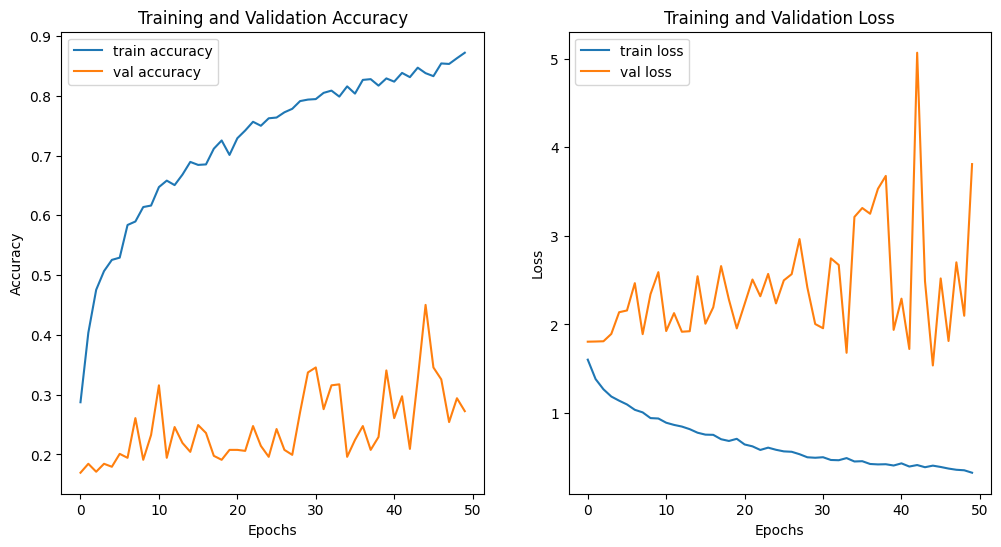

Confusion Matrix:
 [[ 25   0  58   2   0   3]
 [  9  11  69   3   0   3]
 [  0   0 105   6   0   0]
 [  0   0  98   7   0   0]
 [  2   0  76  22   1   1]
 [ 10   0  73   3   0  15]]


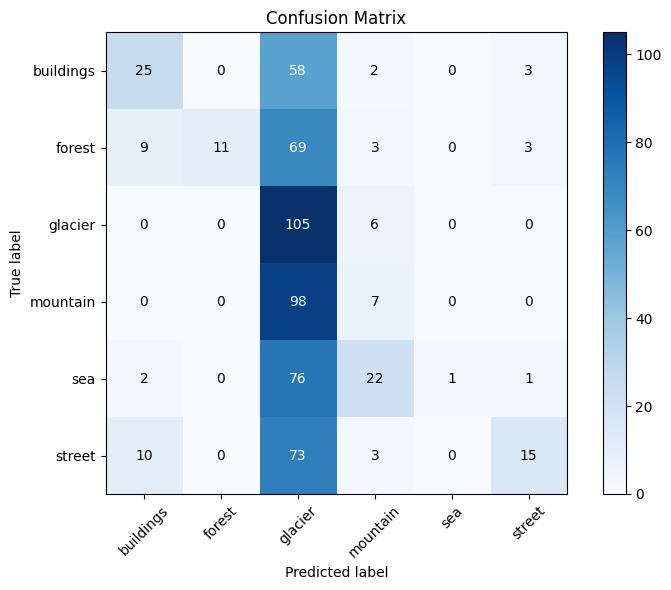

Classification Report:
               precision    recall  f1-score   support

   buildings       0.54      0.28      0.37        88
      forest       1.00      0.12      0.21        95
     glacier       0.22      0.95      0.36       111
    mountain       0.16      0.07      0.09       105
         sea       1.00      0.01      0.02       102
      street       0.68      0.15      0.24       101

    accuracy                           0.27       602
   macro avg       0.60      0.26      0.22       602
weighted avg       0.59      0.27      0.21       602



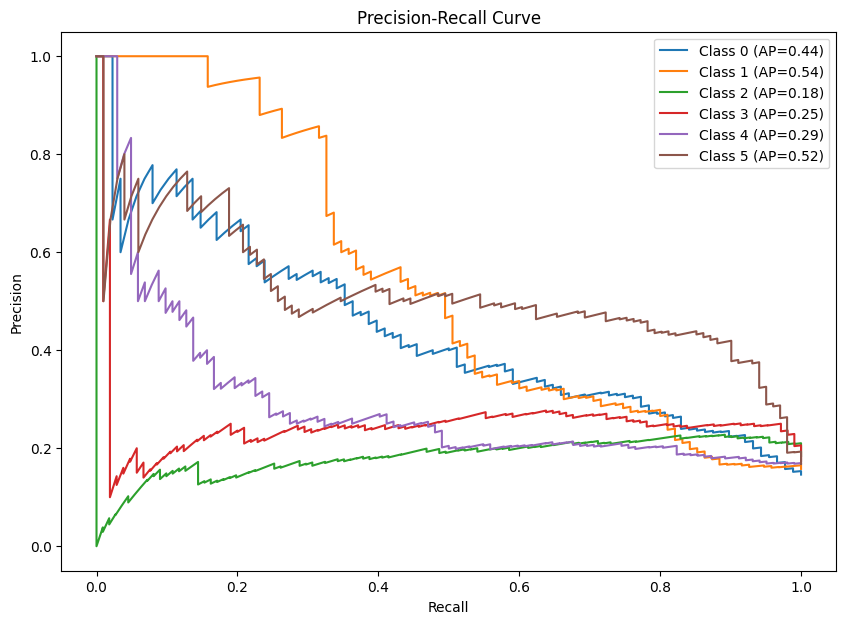


Training with 180 layers unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 95s 586ms/step - accuracy: 0.3401 - loss: 1.5242 - val_accuracy: 0.1744 - val_loss: 1.8182
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.6180 - loss: 0.9553 - val_accuracy: 0.1694 - val_loss: 1.8031
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.6865 - loss: 0.8055 - val_accuracy: 0.1578 - val_loss: 1.8611
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.7363 - loss: 0.6732 - val_accuracy: 0.1578 - val_loss: 1.9394
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.7771 - loss: 0.5987 - val_accuracy: 0.1578 - val_loss: 1.8326
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.7902 - loss: 0.5328 - val_accuracy: 0.1645 - val_loss: 1.7913
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.8322 - loss: 0.4660 - val_accuracy: 0.1910 - val_loss: 1.7121
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.8

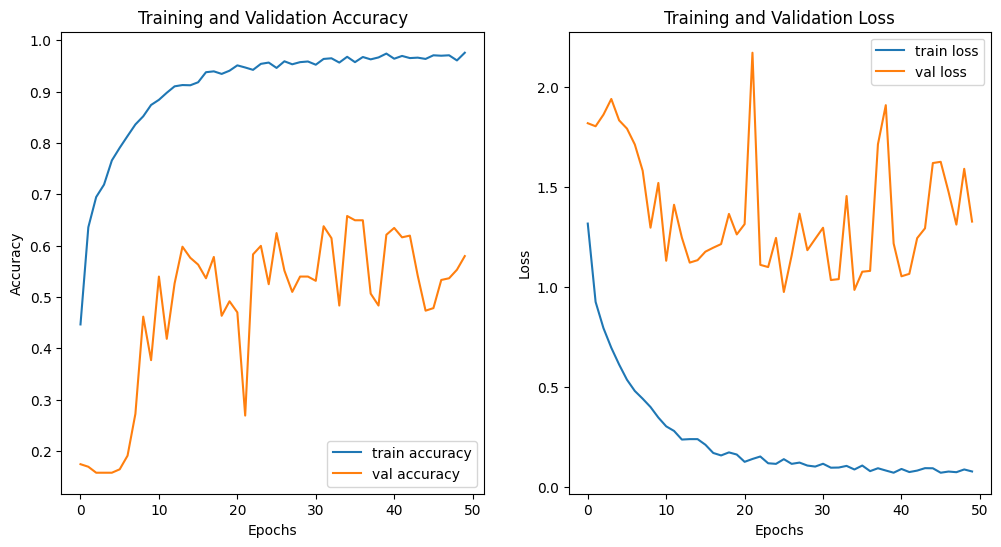

Confusion Matrix:
 [[38  1  5  0  8 36]
 [ 4 56  0  0 10 25]
 [ 3  0 72 13 20  3]
 [ 3  0 18 47 35  2]
 [ 1  0 25  9 61  6]
 [15  0  8  0  3 75]]


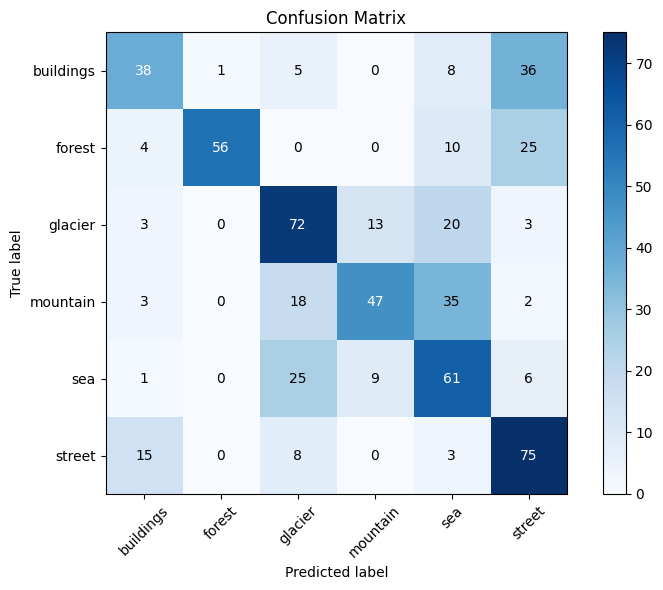

Classification Report:
               precision    recall  f1-score   support

   buildings       0.59      0.43      0.50        88
      forest       0.98      0.59      0.74        95
     glacier       0.56      0.65      0.60       111
    mountain       0.68      0.45      0.54       105
         sea       0.45      0.60      0.51       102
      street       0.51      0.74      0.60       101

    accuracy                           0.58       602
   macro avg       0.63      0.58      0.58       602
weighted avg       0.63      0.58      0.58       602



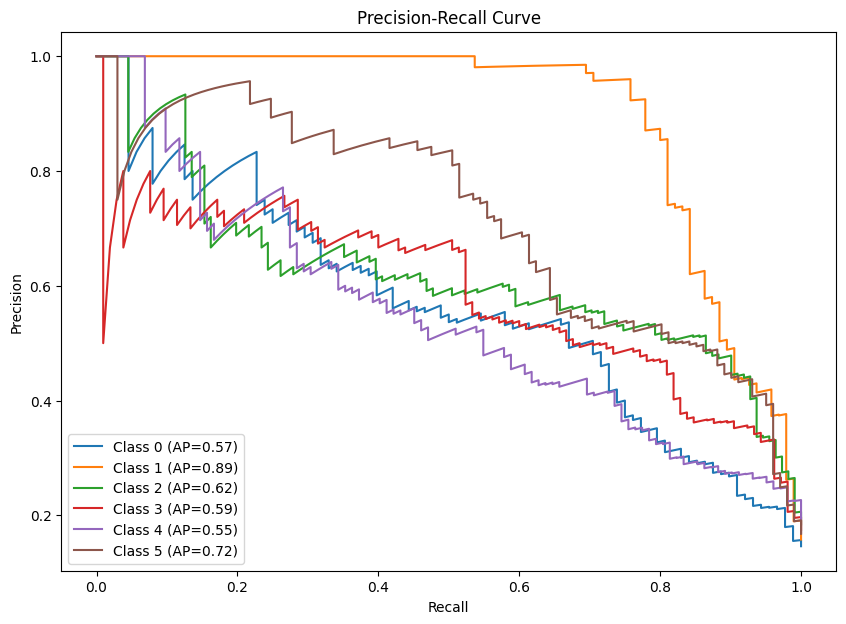


Training with 240 layers unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 121s 693ms/step - accuracy: 0.5489 - loss: 1.3023 - val_accuracy: 0.1744 - val_loss: 1.7930
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.9099 - loss: 0.3195 - val_accuracy: 0.1744 - val_loss: 1.7930
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9515 - loss: 0.1730 - val_accuracy: 0.1960 - val_loss: 1.7900
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - accuracy: 0.9717 - loss: 0.1077 - val_accuracy: 0.2774 - val_loss: 1.7359
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - accuracy: 0.9867 - loss: 0.0660 - val_accuracy: 0.4219 - val_loss: 1.5084
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - accuracy: 0.9858 - loss: 0.0685 - val_accuracy: 0.5498 - val_loss: 1.2068
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.9893 - loss: 0.0349 - val_accuracy: 0.6013 - val_loss: 1.1738
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - acc

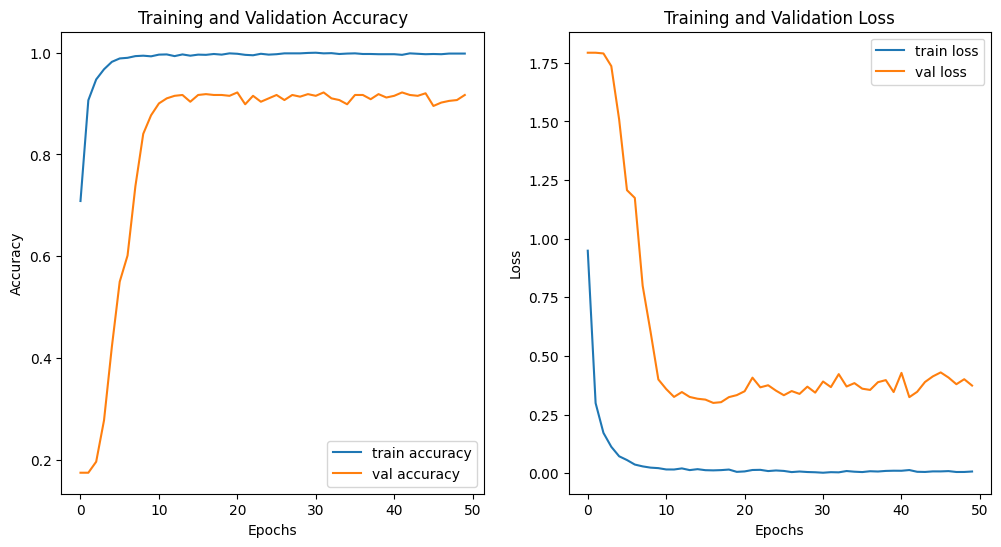

Confusion Matrix:
 [[80  0  0  0  0  8]
 [ 0 93  0  2  0  0]
 [ 0  0 98 11  2  0]
 [ 1  0 11 90  3  0]
 [ 1  0  2  0 99  0]
 [ 7  0  0  1  1 92]]


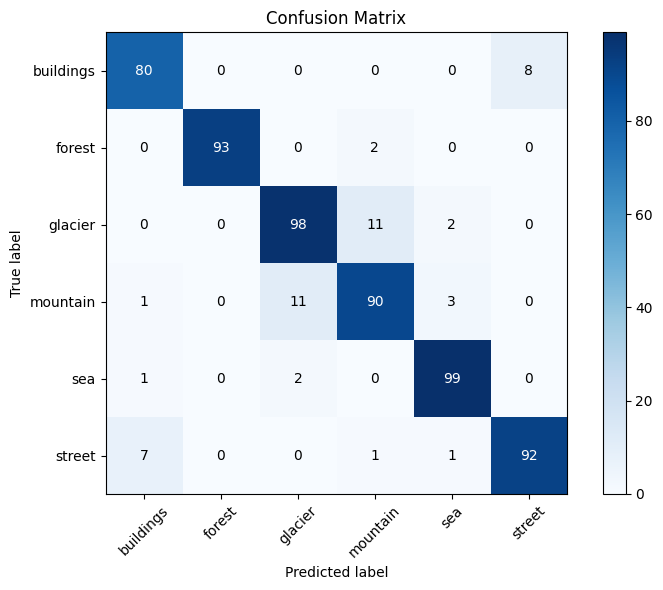

Classification Report:
               precision    recall  f1-score   support

   buildings       0.90      0.91      0.90        88
      forest       1.00      0.98      0.99        95
     glacier       0.88      0.88      0.88       111
    mountain       0.87      0.86      0.86       105
         sea       0.94      0.97      0.96       102
      street       0.92      0.91      0.92       101

    accuracy                           0.92       602
   macro avg       0.92      0.92      0.92       602
weighted avg       0.92      0.92      0.92       602



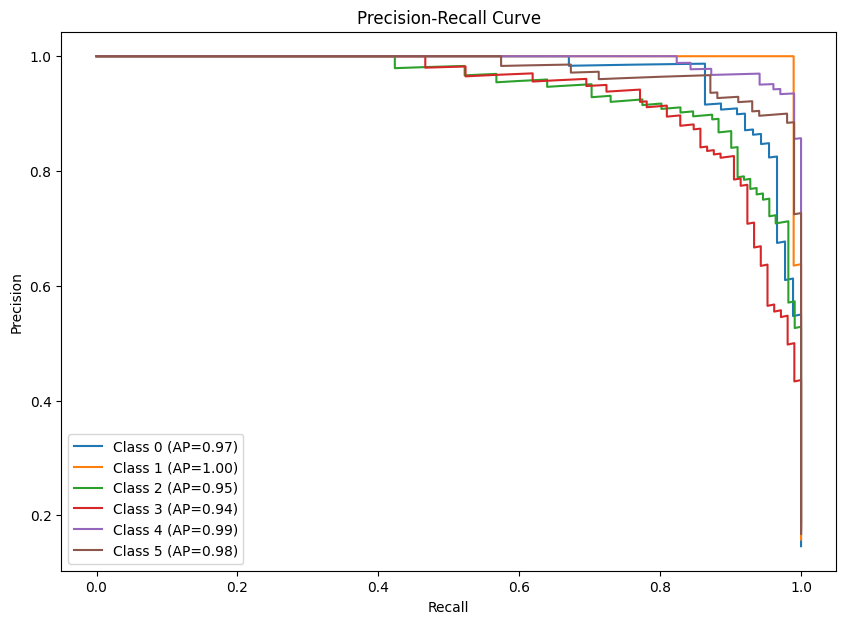

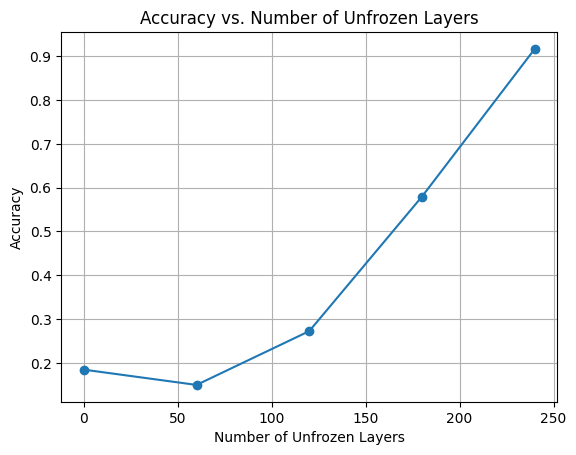

Experiment complete. Results: [(0, 0.18438538205980065), (60, 0.14950166112956811), (120, 0.2724252491694352), (180, 0.579734219269103), (240, 0.9169435215946844)]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Define the model using EfficientNetB0 with configurable unfreeze layers
def define_efficientnet_model(num_classes, unfreeze_layers=0):
    # Load the pre-trained EfficientNetB0 model without the top classifier layer
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freeze all layers by default
    for layer in base_model.layers:
        layer.trainable = False

    # Unfreeze the specified number of layers
    for i in range(len(base_model.layers) - unfreeze_layers, len(base_model.layers)):
        base_model.layers[i].trainable = True

    # Build the model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu', kernel_initializer='he_uniform'),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Function to plot training & validation accuracy and loss curves
def plot_curves(history):
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Function to plot the confusion matrix with values inside the boxes
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

    # Display values in each box
    thresh = cm.max() / 2.0  # Threshold for coloring the text
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.show()

# Function to plot precision-recall curves
def plot_pr_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 7))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        average_precision = average_precision_score(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i} (AP={average_precision:.2f})')

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    plt.show()

# Train only the FC layer
def train_fc_layer(train_it, test_it, num_classes):
    print("\nTraining only the FC layer...")

    # Define the model with all layers frozen
    model = define_efficientnet_model(num_classes, unfreeze_layers=0)

    # Train the model
    history = model.fit(train_it, validation_data=test_it, epochs=50, verbose=1)

    # Evaluate the model
    test_steps = len(test_it)
    y_probs = model.predict(test_it, steps=test_steps, verbose=1)
    y_pred = np.argmax(y_probs, axis=1)
    y_true = test_it.classes

    # Compute metrics
    accuracy = np.sum(y_pred == y_true) / len(y_true)
    print(f"Accuracy with FC layer training only: {accuracy:.4f}")

    # Plot curves
    plot_curves(history)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)
    class_names = list(test_it.class_indices.keys())
    plot_confusion_matrix(cm, class_names)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n", report)

    return model

# Experiment function
def run_efficientnet_experiment(train_dir, test_dir, num_classes, divisions):
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    train_it = datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode='categorical', shuffle=True)
    test_it = datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode='categorical', shuffle=False)

    total_layers = len(EfficientNetB0(weights='imagenet').layers)
    layers_per_division = total_layers // divisions

    results = []
    for i in range(divisions + 1):
        unfreeze_layers = i * layers_per_division
        print(f"\nTraining with {unfreeze_layers} layers unfrozen...")

        # Define and train the model
        model = define_efficientnet_model(num_classes, unfreeze_layers)
        history = model.fit(train_it, validation_data=test_it, epochs=50, verbose=1)

        # Evaluate the model
        test_steps = len(test_it)
        y_probs = model.predict(test_it, steps=test_steps, verbose=1)
        y_pred = np.argmax(y_probs, axis=1)
        y_true = test_it.classes

        # Compute metrics
        accuracy = np.sum(y_pred == y_true) / len(y_true)
        results.append((unfreeze_layers, accuracy))
        print(f"Accuracy with {unfreeze_layers} unfrozen layers: {accuracy:.4f}")

        # Plot curves
        plot_curves(history)

        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        print("Confusion Matrix:\n", cm)
        class_names = list(test_it.class_indices.keys())
        plot_confusion_matrix(cm, class_names)

        # Classification Report
        report = classification_report(y_true, y_pred, target_names=class_names)
        print("Classification Report:\n", report)

        # Precision-Recall Curves
        y_true_one_hot = np.zeros((len(y_true), num_classes))
        y_true_one_hot[np.arange(len(y_true)), y_true] = 1
        plot_pr_curve(y_true_one_hot, y_probs, num_classes)

    # Plot overall results
    unfreeze_counts, accuracies = zip(*results)
    plt.plot(unfreeze_counts, accuracies, marker='o')
    plt.title("Accuracy vs. Number of Unfrozen Layers")
    plt.xlabel("Number of Unfrozen Layers")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.show()

    return results

# Main function to execute the two-step experiment
if __name__ == "__main__":
    train_dir = '/kaggle/working/split_dataset/train'
    test_dir = '/kaggle/working/split_dataset/test'
    num_classes = 6  # Update based on the dataset
    divisions = 4    # Number of divisions for unfreezing layers

    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    train_it = datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode='categorical', shuffle=True)
    test_it = datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode='categorical', shuffle=False)

    # Step 1: Train only the FC layer
    model_fc_trained = train_fc_layer(train_it, test_it, num_classes)

    # Step 2: Gradually unfreeze layers and train
    print("\nProceeding to the main experiment with gradual unfreezing of layers...")
    results = run_efficientnet_experiment(train_dir, test_dir, num_classes, divisions)
    print("Experiment complete. Results:", results)
